In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [6]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [7]:
print("Data Head:\n", df.head())

Data Head:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [8]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


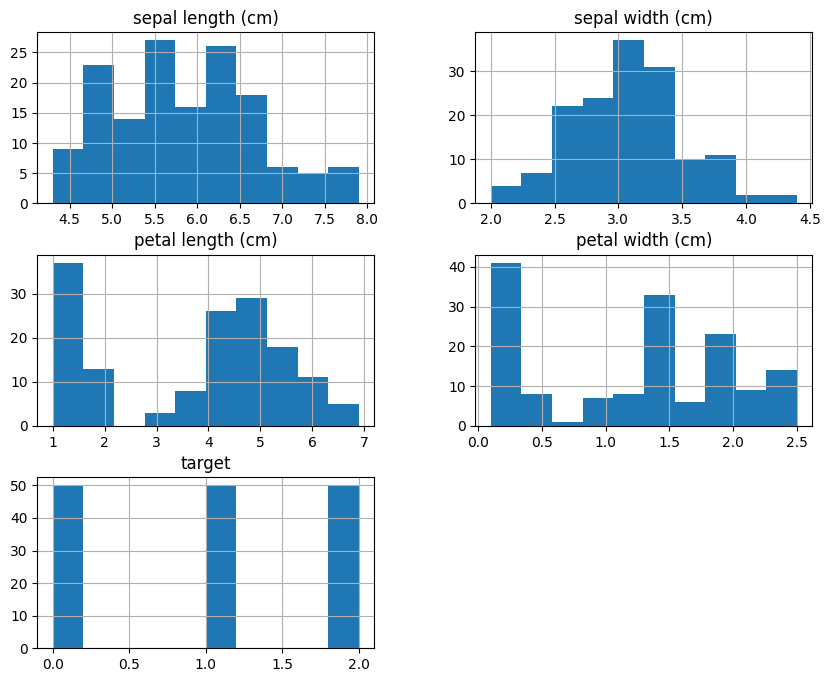

In [10]:
#visualisation
df.hist(figsize=(10, 8))
plt.show()

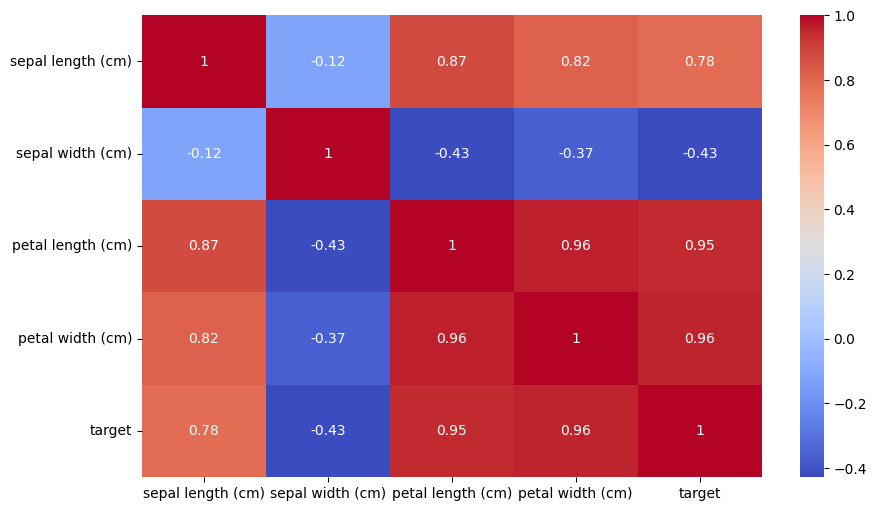

In [11]:
#matrix for corelation
correlation = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#no feature engineeering required as there is no categorical data

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [13]:
X = df.drop('target', axis=1)
y = df['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#taining model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
     

DecisionTreeClassifier(random_state=42)

In [16]:
#making predictions
y_pred = clf.predict(X_test)

In [17]:
#evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [18]:
#hyperparameter
from sklearn.model_selection import GridSearchCV

In [19]:
#grid parameter
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
     

In [20]:
# Initializing GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fitting the model
grid_search.fit(X_train, y_train)

# Displaying best parameters
print("Best Parameters:", grid_search.best_params_)

# using best model to predict
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)
     

Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 2}


Best Model Accuracy: 1.0
Best Model Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



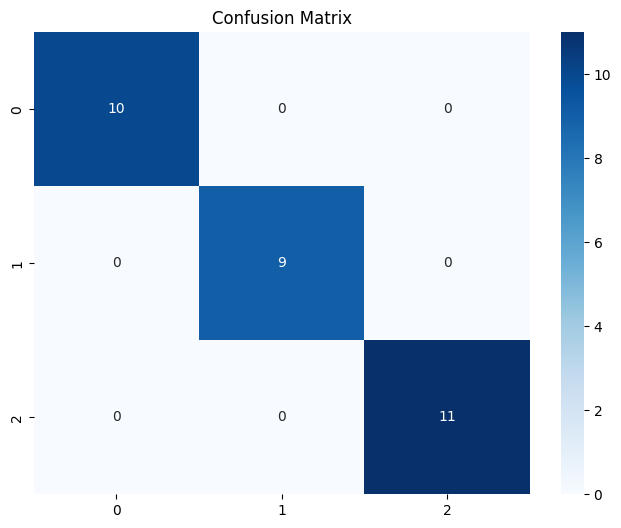

In [22]:
 #Evaluating the best model
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))

# Model Evaluation and Analysis
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_best), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [23]:
#decisiontree
from sklearn.tree import plot_tree


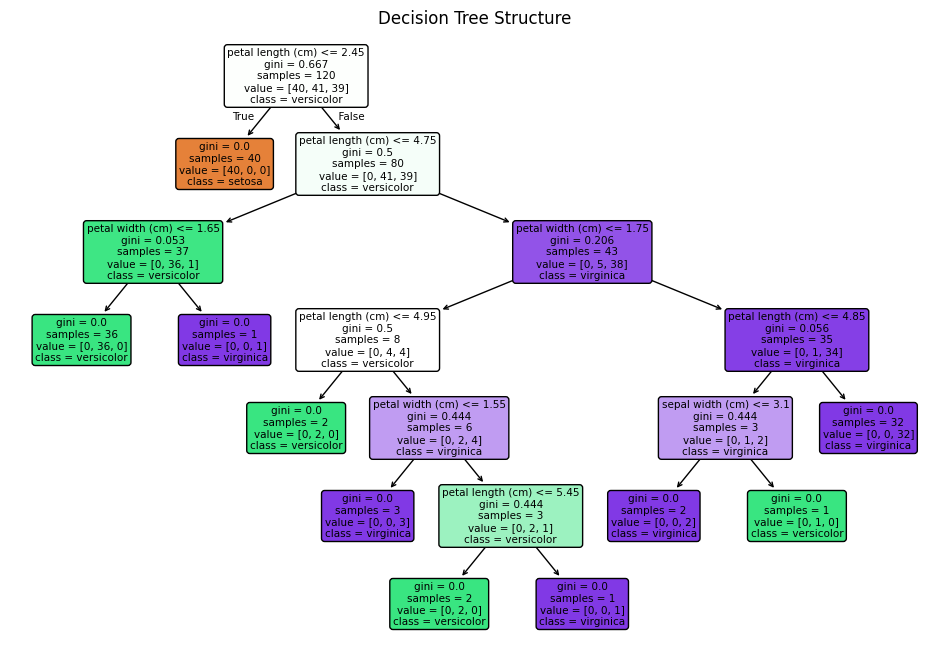

In [24]:
plt.figure(figsize=(12, 8))
plot_tree(best_clf, filled=True, feature_names=X.columns, class_names=data.target_names, rounded=True)
plt.title('Decision Tree Structure')
plt.show()

In [ ]:
# What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
max_depth - this limits how deep the tree can goes.And Prevents from overfitting.
min_samples_split:this need Minimum samples to split a node.  if Higher it gives a simple tree.
min_samples_leaf: this need Minimum samples in a leaf. And helps to avoid tiny leaves.
max_features: this Limits the number of features used to split the dataset. And Adds the randomness.
criterion:This Decides how to split the dataset based on ('gini' or 'entropy').


In [ ]:
# What is the difference between the Label encoding and One-hot encoding?
 Label Encoding: converts categories into numbers 
preferable for ordered data
One-Hot Encoding: converts categories into separate columns with 0s and 1s.
preferable for unordered data